In [1]:
import numpy as np

from uncertainties import ufloat
from uncertainties import umath

from astropy import units as u
from astropy.units import astrophys as astru

In [2]:
T = ufloat(10, 2) ** 2
T

100.0+/-40.0

In [3]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator, hvc_snapshot as snap
from synthesis import hvc_looper as hvcl, magnetic_field_derivation as mfd

collated_data = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits", override_RMs=True)

#print("")

#hvc = snap.take_snapshot(1, collated_data["RMs"], collated_data["HVCs"], collated_data["HI"], collated_data["H-alpha"], collated_data["interpolation"], rm_load_file="../data_processed/hvc_rms/hvc_rms_index_1")

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


In [4]:
#hvcl.add_magnetic_field_RMs(collated_data)

from astropy.table import vstack

master_rm = hvcl.load_HVC_RMs(collated_data, hvc_indicies=[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 24])#, hvc_indicies=[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 22, 24])
master_rm_flat = vstack(master_rm)

#B_virtual = mfd.get_magnetic_field_HVC(hvc)
#B_virtual

=== HVC RM LOADER ===
Taking HVC snapshots
Process complete


In [5]:
master_rm[-2]

ra_dec_obj,H-alpha flux [Error],H-alpha flux,ra_dec_deg,RM,RM_uncert,pol_int,pol_int_uncert,ra_dec_pix_offsets,interpolation_raw,interpolation_cor,interpolation_unc,interpolation_cor_unc,HI,HI [Error],pixel location x,pixel location y,B_virtual [raw],B_virtual_unc [raw],B_virtual [int],B_virtual_unc [int]
"deg,deg",R,R,,rad / m2,rad / m2,,,,rad / m2,rad / m2,rad / m2,rad / m2,dex(1 / cm2),dex(1 / cm2),,,G,G,G,G
SkyCoord,float32,float32,float64[2],float64,float64,float64,float64,float64[2],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
"42.902191047514336,-55.01477420883195",1.2109375,0.1000061,42.902191047514336 .. -55.01477420883195,17.67769239770644,0.4163802009866592,0.0010661131471542973,1.6496889776736983e-05,2479.47265625 .. -1234.140136719,19.372422349773277,19.80475064127836,5.5625338764009955,5.597792509132278,19.090503692626953,9.545251846313477,9.572176105204221,9.458402754118424,5.5979361420192686e-06,2.5302351452410455e-06,-5.366645055362769e-07,2.836774718571389e-06
"42.903698108272025,-55.018734020258684",1.2109375,0.1000061,42.903698108272025 .. -55.018734020258684,16.176559463968523,1.81950939438474,0.00024366130111466562,1.6475915820141596e-05,2480.781738281 .. -1226.963378906,19.372422349773277,19.80475064127836,5.5625338764009955,5.597792509132278,19.090503692626953,9.545251846313477,9.61050084329679,9.406688572886424,5.122577361320201e-06,2.5450839708893715e-06,-1.012023286235344e-06,2.8976621878940297e-06
"44.86536790327216,-54.01358820001671",1.2734375,0.7631836,44.86536790327216 .. -54.01358820001671,20.149747328697757,1.036605869031703,0.0006010061964708131,2.3152682501661707e-05,4613.64453125 .. -2933.515625,19.691441471674583,19.750179932584473,5.973022479837245,6.246831811259054,0.0,0.0,13.001754310613137,40.225866053300706,6.380753567049736e-06,2.6329949131841895e-06,1.4513019365932644e-07,2.932569563735752e-06
"42.9317322623515,-54.97675698883515",1.2109375,0.13146973,42.9317322623515 .. -54.97675698883515,19.359880636470344,0.11671999631123343,0.003795678752499534,1.646430554326909e-05,2512.312011719 .. -1301.461425781,19.085099870569504,19.551041479343816,5.470733660110953,5.545082244684292,19.069507598876953,9.534753799438477,9.437663811338666,10.289282912466433,6.1306291048563155e-06,2.584447057312953e-06,8.701391256064714e-08,2.8136345831073634e-06
"42.933254285578194,-54.98204035424923",1.2109375,0.1000061,42.933254285578194 .. -54.98204035424923,19.792678518685964,0.2596330098185573,0.0017012413720154664,1.6414760358801328e-05,2513.552246094 .. -1291.902832031,19.228761110171217,19.67278672468094,5.516633768255918,5.56824460749803,19.069507598876953,9.534753799438477,9.4861594932986,10.216449161458286,6.267681772848126e-06,2.600870840375719e-06,1.785738529225748e-07,2.8237646623659202e-06
"44.44678109681912,-53.50218566172738",1.2421875,0.4564209,44.44678109681912 .. -53.50218566172738,15.862374598335851,1.8223469596998718,0.0003288167138038949,2.226863794848459e-05,4223.184814453 .. -3878.553710938,18.529676612561822,18.188697729738017,6.366530368992449,5.810621077883571,0.0,0.0,6.993102079031246,45.78413289120158,5.023085483362827e-06,2.535961838125686e-06,-8.446456704413297e-07,3.056902115626097e-06
"43.48611077185344,-55.74456413040774",1.2109375,0.1000061,43.48611077185344 .. -55.74456413040774,17.582310536163302,2.6338899376319262,0.00017200072028006943,1.6835909861414212e-05,3025.128173828 .. 101.6435546875,18.230172506212885,18.83105322664178,5.292776226177268,5.890323169540359,19.058130264282227,9.529065132141113,18.22847950785865,2.27439849892221,5.5677318846980645e-06,2.6579197047478245e-06,-2.0515629843468152e-07,2.901789416989168e-06
"42.698913400821226,-54.91802589645858",1.2109375,0.1000061,42.698913400821226 .. -54.91802589645858,13.174927374801996,1.2674891452130679,0.00035169763701176744,1.656618100668629e-05,2275.318847656 .. -1415.144042969,19.301628924660783,19.468468519886535,5.635051618432332,5.6579373862786575,19.02197

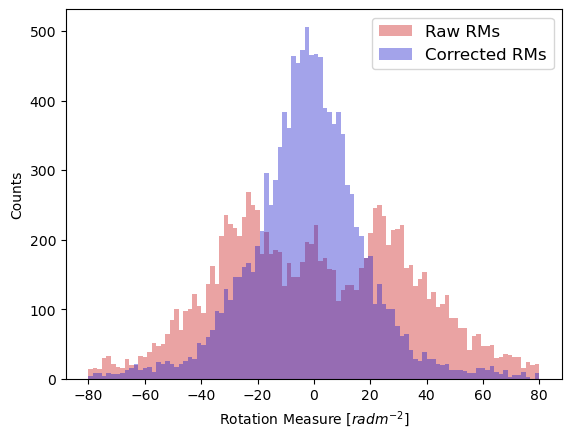

In [6]:
import matplotlib.pyplot as plt
from plotting import honours_plot as hplt

hplt.plot_3hist(master_rm_flat["RM"], master_rm_flat["RM"]-master_rm_flat["interpolation_raw"], master_rm_flat["RM"]-master_rm_flat["interpolation_raw"], "Raw RMs", "", "Corrected RMs", "", (-80, 80), xlabel=r"Rotation Measure [$rad m^{-2}$]", ylabel="Counts", legend_size=12) # Virtual (single-point) magnetic field profile of filtered HVCs